Questo link vale come oro per le `data.table`

https://stackoverflow.com/questions/1727772/quickly-reading-very-large-tables-as-dataframes-in-r/15058684#15058684

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/datatable_Cheat_Sheet_R.pdf

In [194]:
library(data.table)

In [195]:
list.files(path="../log")

[1] "connectionLog.csv" "graph.gml"         "graphN.gml"       
[4] "memoryLog.csv"     "messageLog.csv"    "plot-0100.pdf"    
[7] "tutorial"

In [196]:
which(list.files(path="../log") == "memoryLog.csv") ## check if file exist

[1] 4

In [197]:
system.time(DT <- fread("../log/memoryLog.csv"))

   user  system elapsed 
  0.025   0.000   0.025 

In [198]:
names(DT) ## come csv normale

[1] "agent" "time"  "state" "news0"

In [199]:
subset(DT, time == 500) ## come csv normale legge tutte le colonne aventi time == 1

agent,time,state,news0
0,500,x,9b52894250cde8fa
1,500,x,e470d9c0f7f2bb9f
2,500,x,ea3175f9bae94f24
3,500,u,e470d9c0f7f2bb9f
4,500,d,e470d9c0f7f2bb9f
5,500,d,ea3175f9bae94f24
6,500,u,e470d9c0f7f2bb9f
7,500,d,9b52894250cde8fa
8,500,d,e470d9c0f7f2bb9f
9,500,d,ea3175f9bae94f24


In [200]:
subset(DT, time == 101)[,.N,by=state]

state,N
x,3
d,112
u,88


In [201]:
maxtime = DT[][which.max(time)]$time

In [202]:
TB <- data.table(x=integer(),d=integer(), u=integer())
for (i in 1:maxtime) {
    xt = subset(DT, time == i)[,.N,by=state]$N[1]
    dt = subset(DT, time == i)[,.N,by=state]$N[2]
    ut = subset(DT, time == i)[,.N,by=state]$N[3]
    TB <- rbindlist(list(TB,  data.table(x = xt, d = dt, u = ut)))
}
TB

x,d,u
3,174,26
3,174,26
3,146,54
3,106,94
3,157,43
3,134,66
3,86,114
3,63,137
3,159,41
3,141,59


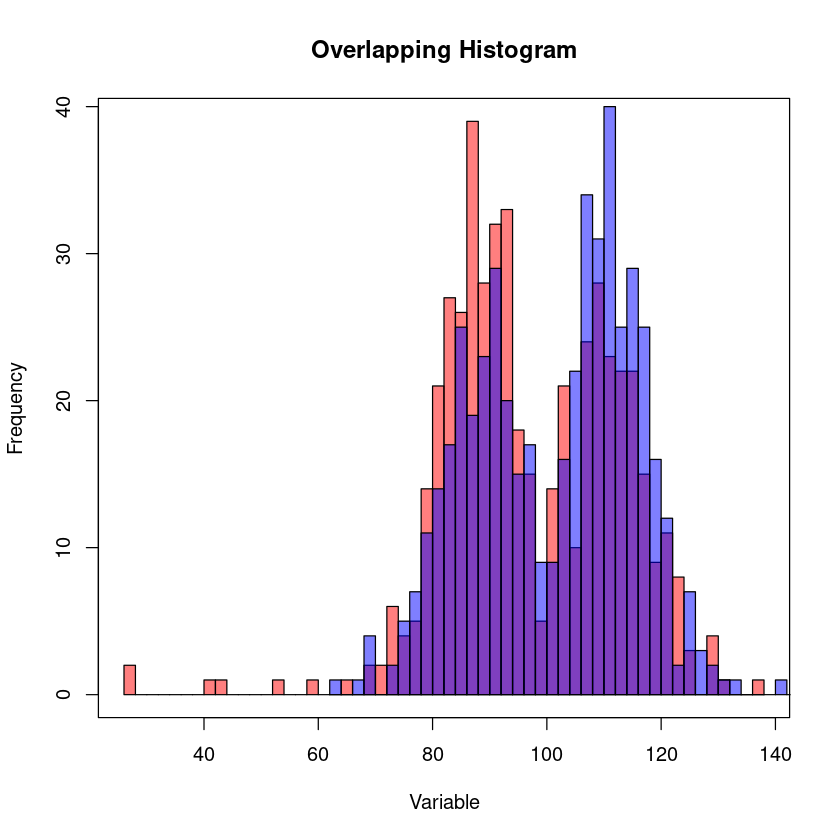

In [203]:
# Histogram Colored (blue and red)
hist(TB$u, col=rgb(1,0,0,0.5),main="Overlapping Histogram", xlab="Variable", breaks=50)
hist(TB$d, col=rgb(0,0,1,0.5), add=T, breaks=50)
box()